C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\1490548885.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\1490548885.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\1490548885.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)
C:\User

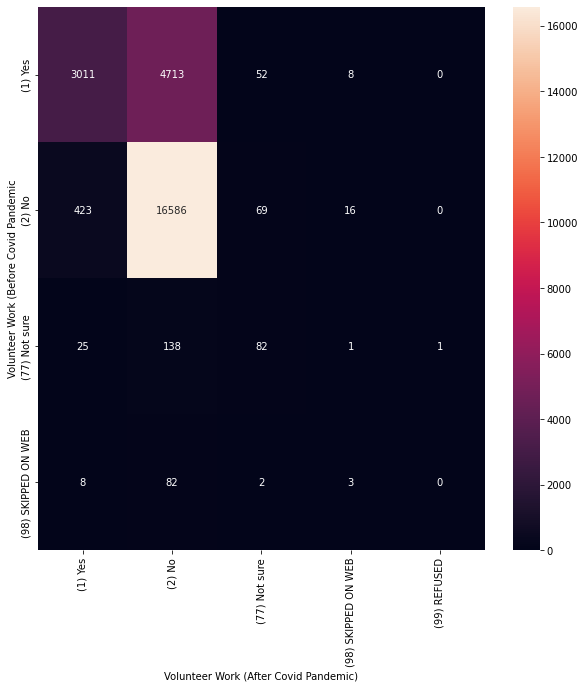

In [16]:
#IMPORTING DATASET(.CSV) INTO PANDAS DATAFRAME
import alt as alt
import pandas as pd

dataset1 = pd.read_csv('01_april_30_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset1.columns = map(str.upper, dataset1.columns)

dataset2 = pd.read_csv('02_May_12_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')

dataset3 = pd.read_csv('03_june_9_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset3.columns = map(str.upper, dataset3.columns)

#Selected Features
selected_features = ['SOC1','SOC2A','SOC2B','SOC3A','SOC3B','SOC4A','SOC4B',
                      'SOC5A','SOC5B','SOC5C','SOC5D','SOC5E',
                      'PHYS1A','PHYS1B','PHYS1C','PHYS1D','PHYS1E','PHYS1F','PHYS1G','PHYS1H','PHYS1I','PHYS1J','PHYS1K','PHYS1L','PHYS1M','PHYS1N','PHYS1O','PHYS1P','PHYS1Q',
                      'PHYS2_1','PHYS2_2','PHYS2_3','PHYS2_4','PHYS2_5','PHYS2_6','PHYS2_7','PHYS2_8','PHYS2_9','PHYS2_10','PHYS2_11','PHYS2_12','PHYS2_13','PHYS2_14','PHYS2_15','PHYS2_16','PHYS2_17','PHYS2_18','PHYS2_19',
                      'PHYS7_1','PHYS7_2','PHYS7_3','PHYS7_4',
                      'PHYS8',
                      'PHYS10A','PHYS10B','PHYS10C','PHYS10D','PHYS10E',
                      'AGE7','GENDER','RACETH','ECON4A','ECON4B','HHINCOME','EDUCATION','HHSIZE1','HH_BANNER',
                      ]


df1 = dataset1[selected_features]
df1.dropna(inplace=True)
df2 = dataset2[selected_features]
df2.dropna(inplace=True)
df3 = dataset3[selected_features]
df3.dropna(inplace=True)

df = df1.append(df2,ignore_index = True).append(df3,ignore_index = True)
# df.isna().sum()

#Exporting Selected Features from datasets
from pathlib import Path

filepath1 = Path('C:\python\df1.csv')
filepath1.parent.mkdir(parents=True, exist_ok=True)
df1.to_csv(filepath1)

filepath2 = Path('C:\python\df2.csv')
filepath2.parent.mkdir(parents=True, exist_ok=True)
df2.to_csv(filepath2)

filepath3 = Path('C:\python\df3.csv')
filepath3.parent.mkdir(parents=True, exist_ok=True)
df3.to_csv(filepath3)

filepath = Path('C:\python\df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

#SE1: Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic
import matplotlib.pyplot as plt
import seaborn as sns
SE1 = pd.crosstab(df['SOC4B'],
                  df['SOC4A'],
                 margins = False)

fig, ax = plt.subplots(figsize=(10, 10))
s= sns.heatmap(SE1, annot=True,fmt='g')
s.set(xlabel='Volunteer Work (After Covid Pandemic)', ylabel='Volunteer Work (Before Covid Pandemic')
plt.savefig("C:\python\SE06-CROSS.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

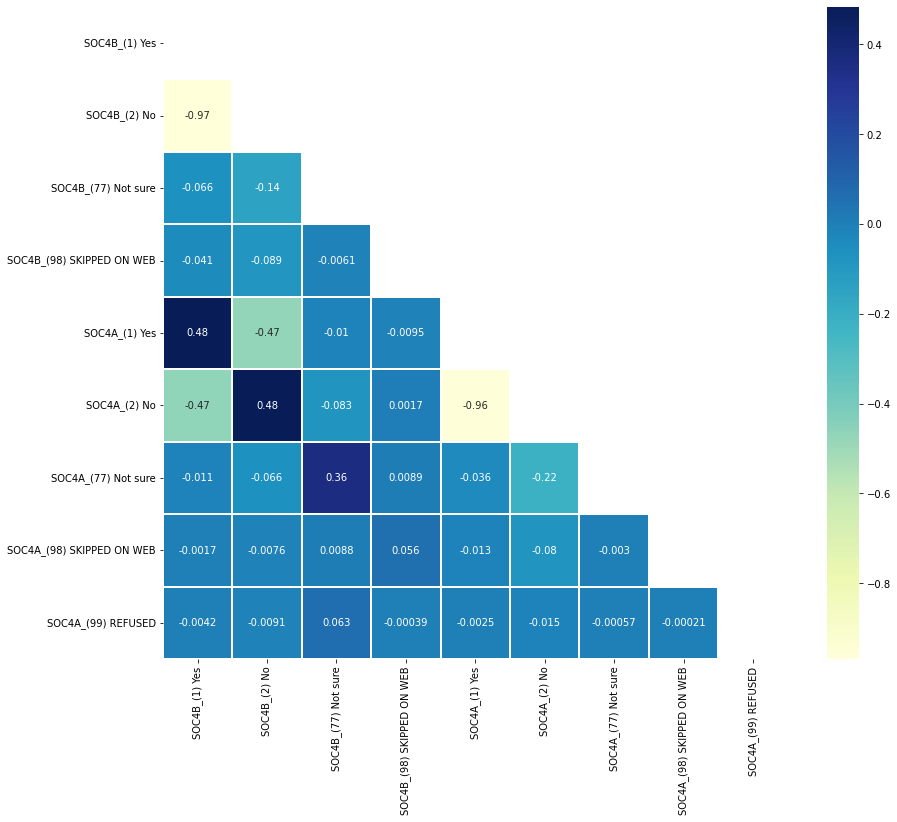

In [2]:
import numpy as np

SE4 = pd.get_dummies(df[['SOC4B','SOC4A']])
plt.figure(figsize=(14,12))
SE4_CORR = SE4.corr()
matrix = np.triu(SE4_CORR)
s=sns.heatmap(SE4_CORR,linewidths=.1,cmap="YlGnBu", annot=True, mask=matrix)
plt.yticks(rotation=0);
plt.savefig("C:\python\SE04-CORR.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

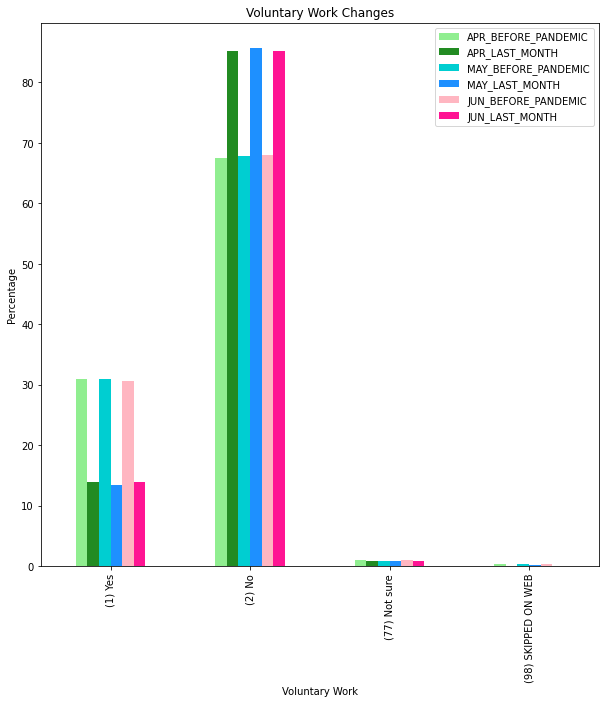

In [4]:
se4_1=df1[['SOC4B','SOC4A']]

se4_apr = df1[['SOC4B','SOC4A']]

data1B=se4_1['SOC4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se4_1['SOC4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se4_2=df2[['SOC4B','SOC4A']]
data2B=se4_2['SOC4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se4_2['SOC4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se4_3=df3[['SOC4B','SOC4A']]
data3B=se4_3['SOC4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se4_3['SOC4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)
x= data1.iloc[: , 1:]*100
data1 = pd.concat([data1B['unique_values'],x], axis = 1)

plotdata = pd.DataFrame({
 "APR_BEFORE_PANDEMIC":data1['april_before'].values,
    "APR_LAST_MONTH":data1['april_after'].values,
    "MAY_BEFORE_PANDEMIC":data1['may_before'].values,
    "MAY_LAST_MONTH":data1['may_after'].values,
    "JUN_BEFORE_PANDEMIC":data1['june_before'].values,
    "JUN_LAST_MONTH":data1['june_after'].values
    },
    index=data1['unique_values']
)
color_dict = {'APR_BEFORE_PANDEMIC':'#90EE90',
              'APR_LAST_MONTH':'#228B22',
              'MAY_BEFORE_PANDEMIC': '#00CED1',
              'MAY_LAST_MONTH': '#1E90FF',
              'JUN_BEFORE_PANDEMIC': '#FFB6C1',
              'JUN_LAST_MONTH': '#FF1493',
              }
plotdata.plot(kind="bar",figsize=(10,10) , color = color_dict)
plt.title("Voluntary Work Changes")
plt.xlabel("Voluntary Work")
plt.ylabel("Percentage")
# plt.savefig(SE03.png)
plt.savefig("C:\python\SE04-BAR.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\1158755107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se5_age.drop(se5_age.loc[df['SOC4B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\1158755107.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se5_age.drop(se5_age.loc[df['SOC4B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\1158755107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

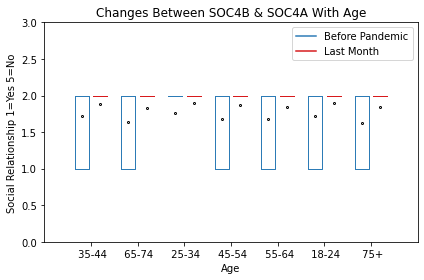

In [14]:
se5_age=df[['SOC4B','SOC4A','AGE7']]

se5_age.drop(se5_age.loc[df['SOC4B']== '(77) Not sure'].index, inplace=True)
se5_age.drop(se5_age.loc[df['SOC4B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_age.drop(se5_age.loc[df['SOC4A']== '(77) Not sure'].index, inplace=True)
se5_age.drop(se5_age.loc[df['SOC4A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_age.drop(se5_age.loc[df['SOC4A']== '(99) REFUSED'].index, inplace=True)
se5_age.drop(se5_age.loc[df['AGE7']== '(88) Removed for disclosure risk'].index, inplace=True)

se5_age['SOC4B']=se5_age['SOC4B'].str[1:]
se5_age['SOC4B'] = se5_age['SOC4B'].str.split(')').str[0].astype(int)
se5_age['SOC4A']=se5_age['SOC4A'].str[1:]
se5_age['SOC4A'] = se5_age['SOC4A'].str.split(')').str[0].astype(int)

ticks = se5_age['AGE7'].str.split(')').str[1].unique();
cols = se5_age['AGE7'].unique();
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se5_age['AGE7'] == cols[i]
    data_b.append(se5_age[mask]['SOC4B'])
    data_a.append(se5_age[mask]['SOC4A'])

bpl = plt.boxplot(data_b,
                  positions=np.array(range(len(data_b)))*2.0-0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})

bpr = plt.boxplot(data_a,
                  positions=np.array(range(len(data_a)))*2.0+0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

set_box_color(bpl, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#D7191C')

plt.plot([], c='#2C7BB6', label='Before Pandemic')
plt.plot([], c='#D7191C', label='Last Month')
plt.legend()
plt.ylabel('Social Relationship 1=Yes 5=No')
plt.xlabel('Age')
plt.title('Changes Between SOC4B & SOC4A With Age')

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 3)
plt.tight_layout()
plt.savefig('C:\python\se5-age.png',format='png', dpi=600)













C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\3613979537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se5_sex.drop(se5_sex.loc[df['SOC4B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\3613979537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se5_sex.drop(se5_sex.loc[df['SOC4B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\3613979537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

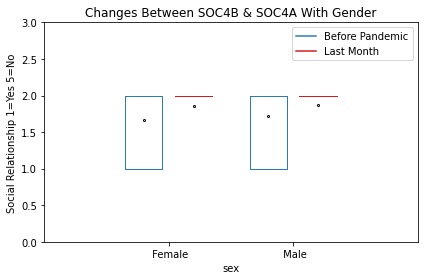

In [13]:
se5_sex=df[['SOC4B','SOC4A','GENDER']]

se5_sex.drop(se5_sex.loc[df['SOC4B']== '(77) Not sure'].index, inplace=True)
se5_sex.drop(se5_sex.loc[df['SOC4B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_sex.drop(se5_sex.loc[df['SOC4A']== '(77) Not sure'].index, inplace=True)
se5_sex.drop(se5_sex.loc[df['SOC4A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_sex.drop(se5_sex.loc[df['SOC4A']== '(99) REFUSED'].index, inplace=True)
se5_sex.drop(se5_sex.loc[df['GENDER']== '(98) SKIPPED ON WEB'].index, inplace=True)

se5_sex['SOC4B']=se5_sex['SOC4B'].str[1:]
se5_sex['SOC4B'] = se5_sex['SOC4B'].str.split(')').str[0].astype(int)
se5_sex['SOC4A']=se5_sex['SOC4A'].str[1:]
se5_sex['SOC4A'] = se5_sex['SOC4A'].str.split(')').str[0].astype(int)

ticks = se5_sex['GENDER'].str.split(')').str[1].unique();
cols = se5_sex['GENDER'].unique();
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se5_sex['GENDER'] == cols[i]
    data_b.append(se5_sex[mask]['SOC4B'])
    data_a.append(se5_sex[mask]['SOC4A'])

bpl = plt.boxplot(data_b,
                  positions=np.array(range(len(data_b)))*2.0-0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})

bpr = plt.boxplot(data_a,
                  positions=np.array(range(len(data_a)))*2.0+0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

set_box_color(bpl, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#D7191C')

plt.plot([], c='#2C7BB6', label='Before Pandemic')
plt.plot([], c='#D7191C', label='Last Month')
plt.legend()
plt.ylabel('Social Relationship 1=Yes 5=No')
plt.xlabel('sex')
plt.title('Changes Between SOC4B & SOC4A With Gender')

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 3)
plt.tight_layout()
plt.savefig('C:\python\se5-sex.png',format='png', dpi=600)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\598550561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se5_inc.drop(se5_inc.loc[df['SOC4B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\598550561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se5_inc.drop(se5_inc.loc[df['SOC4B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\598550561.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

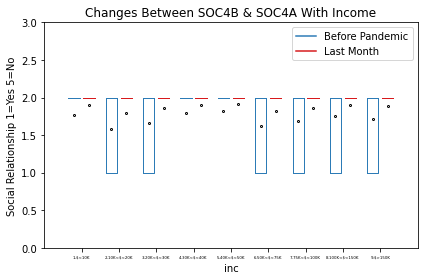

In [12]:
se5_inc=df[['SOC4B','SOC4A','HHINCOME']]

# se5_inc['HHINCOME'].unique()

se5_inc.drop(se5_inc.loc[df['SOC4B']== '(77) Not sure'].index, inplace=True)
se5_inc.drop(se5_inc.loc[df['SOC4B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_inc.drop(se5_inc.loc[df['SOC4A']== '(77) Not sure'].index, inplace=True)
se5_inc.drop(se5_inc.loc[df['SOC4A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_inc.drop(se5_inc.loc[df['SOC4A']== '(99) REFUSED'].index, inplace=True)
se5_inc.drop(se5_inc.loc[df['HHINCOME']== 'REFUSED'].index, inplace=True)
se5_inc.drop(se5_inc.loc[df['HHINCOME']== 'SKIPPED ON WEB'].index, inplace=True)
se5_inc.drop(se5_inc.loc[df['HHINCOME']== "DON'T KNOW"].index, inplace=True)
df['HHINCOME'] = df['HHINCOME'].replace(['Under $10,000'],'1-$<10K')
df['HHINCOME'] = df['HHINCOME'].replace(['$10,000 to under $20,000'],'2-10K<$<20K')
df['HHINCOME'] = df['HHINCOME'].replace(['$20,000 to under $30,000'],'3-20K<$<30K')
df['HHINCOME'] = df['HHINCOME'].replace(['$30,000 to under $40,000'],'4-30K<$<40K')
df['HHINCOME'] = df['HHINCOME'].replace(['$40,000 to under $50,000'],'5-40K<$<50K')
df['HHINCOME'] = df['HHINCOME'].replace(['$50,000 to under $75,000'],'6-50K<$<75K')
df['HHINCOME'] = df['HHINCOME'].replace(['$75,000 to under $100,000'],'7-75K<$<100K')
df['HHINCOME'] = df['HHINCOME'].replace(['$100,000 to under $150,000'],'8-100K<$<150K')
df['HHINCOME'] = df['HHINCOME'].replace(['$150,000 or more'],'9-$>150K')



se5_inc['SOC4B']=se5_inc['SOC4B'].str[1:]
se5_inc['SOC4B'] = se5_inc['SOC4B'].str.split(')').str[0].astype(int)
se5_inc['SOC4A']=se5_inc['SOC4A'].str[1:]
se5_inc['SOC4A'] = se5_inc['SOC4A'].str.split(')').str[0].astype(int)

ticks = se5_inc['HHINCOME'].sort_values().unique()
cols = se5_inc['HHINCOME'].unique()
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se5_inc['HHINCOME'] == cols[i]
    data_b.append(se5_inc[mask]['SOC4B'])
    data_a.append(se5_inc[mask]['SOC4A'])

bpl = plt.boxplot(data_b,
                  positions=np.array(range(len(data_b)))*2.0-0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})

bpr = plt.boxplot(data_a,
                  positions=np.array(range(len(data_a)))*2.0+0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

set_box_color(bpl, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#D7191C')

plt.plot([], c='#2C7BB6', label='Before Pandemic')
plt.plot([], c='#D7191C', label='Last Month')
plt.legend()
plt.ylabel('Social Relationship 1=Yes 5=No')
plt.xlabel('inc')
plt.xticks(fontsize=4)
plt.title('Changes Between SOC4B & SOC4A With Income')


plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 3)
plt.tight_layout()
plt.savefig('C:\python\se5-inc.png',format='png', dpi=600)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\2894446067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se5_edu.drop(se5_edu.loc[df['SOC4B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\2894446067.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se5_edu.drop(se5_edu.loc[df['SOC4B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\2894446067.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

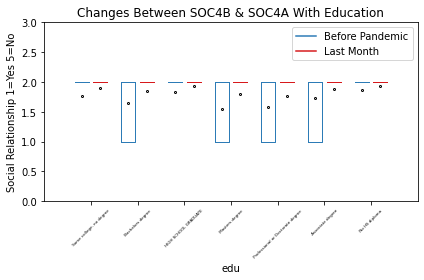

In [11]:

se5_edu=df[['SOC4B','SOC4A','EDUCATION']]

se5_edu['EDUCATION'].unique()


se5_edu.drop(se5_edu.loc[df['SOC4B']== '(77) Not sure'].index, inplace=True)
se5_edu.drop(se5_edu.loc[df['SOC4B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_edu.drop(se5_edu.loc[df['SOC4A']== '(77) Not sure'].index, inplace=True)
se5_edu.drop(se5_edu.loc[df['SOC4A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_edu.drop(se5_edu.loc[df['SOC4A']== '(99) REFUSED'].index, inplace=True)
se5_edu.drop(se5_edu.loc[df['EDUCATION']== '(99) REFUSED'].index, inplace=True)
se5_edu.drop(se5_edu.loc[df['EDUCATION']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_edu.drop(se5_edu.loc[df['EDUCATION']== '(77) Not sure'].index, inplace=True)
df['EDUCATION'] = df['EDUCATION'].replace(['(2) HIGH SCHOOL GRADUATE - high school DIPLOMA or the equivalent (GED)'],'(2) HIGH SCHOOL GRADUATE')


se5_edu['SOC4B']=se5_edu['SOC4B'].str[1:]
se5_edu['SOC4B'] = se5_edu['SOC4B'].str.split(')').str[0].astype(int)
se5_edu['SOC4A']=se5_edu['SOC4A'].str[1:]
se5_edu['SOC4A'] = se5_edu['SOC4A'].str.split(')').str[0].astype(int)

ticks = se5_edu['EDUCATION'].str.split(')').str[1].unique();
cols = se5_edu['EDUCATION'].unique();
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se5_edu['EDUCATION'] == cols[i]
    data_b.append(se5_edu[mask]['SOC4B'])
    data_a.append(se5_edu[mask]['SOC4A'])

bpl = plt.boxplot(data_b,
                  positions=np.array(range(len(data_b)))*2.0-0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})

bpr = plt.boxplot(data_a,
                  positions=np.array(range(len(data_a)))*2.0+0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

set_box_color(bpl, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#D7191C')

plt.plot([], c='#2C7BB6', label='Before Pandemic')
plt.plot([], c='#D7191C', label='Last Month')
plt.legend()
plt.ylabel('Social Relationship 1=Yes 5=No')
plt.xlabel('edu')
plt.xticks(fontsize=4 , rotation=45)
plt.title('Changes Between SOC4B & SOC4A With Education')

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 3)
plt.tight_layout()
plt.savefig('C:\python\se5-edu.png',format='png', dpi=600)

C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\1401193232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se5_rac.drop(se5_rac.loc[df['SOC4B']== '(77) Not sure'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\1401193232.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se5_rac.drop(se5_rac.loc[df['SOC4B']== '(98) SKIPPED ON WEB'].index, inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_7264\1401193232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

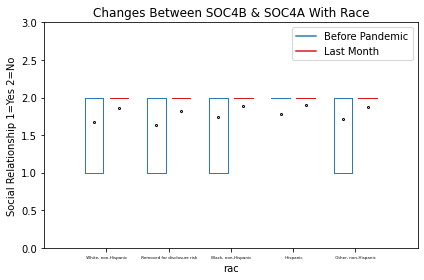

In [8]:
se5_rac=df[['SOC4B','SOC4A','RACETH']]

se5_rac['RACETH'].unique()


se5_rac.drop(se5_rac.loc[df['SOC4B']== '(77) Not sure'].index, inplace=True)
se5_rac.drop(se5_rac.loc[df['SOC4B']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_rac.drop(se5_rac.loc[df['SOC4A']== '(77) Not sure'].index, inplace=True)
se5_rac.drop(se5_rac.loc[df['SOC4A']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_rac.drop(se5_rac.loc[df['SOC4A']== '(99) REFUSED'].index, inplace=True)
se5_rac.drop(se5_rac.loc[df['RACETH']== '(99) REFUSED'].index, inplace=True)
se5_rac.drop(se5_rac.loc[df['RACETH']== '(98) SKIPPED ON WEB'].index, inplace=True)
se5_rac.drop(se5_rac.loc[df['RACETH']== "(77) DON'T KNOW"].index, inplace=True)

se5_rac['SOC4B']=se5_rac['SOC4B'].str[1:]
se5_rac['SOC4B'] = se5_rac['SOC4B'].str.split(')').str[0].astype(int)
se5_rac['SOC4A']=se5_rac['SOC4A'].str[1:]
se5_rac['SOC4A'] = se5_rac['SOC4A'].str.split(')').str[0].astype(int)

ticks = se5_rac['RACETH'].str.split(')').str[1].unique();
cols = se5_rac['RACETH'].unique();
mask=[]
data_b=[]
data_a=[]

for i in range(len(ticks)):
    mask = se5_rac['RACETH'] == cols[i]
    data_b.append(se5_rac[mask]['SOC4B'])
    data_a.append(se5_rac[mask]['SOC4A'])

bpl = plt.boxplot(data_b,
                  positions=np.array(range(len(data_b)))*2.0-0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})

bpr = plt.boxplot(data_a,
                  positions=np.array(range(len(data_a)))*2.0+0.4,
                  sym='',
                  widths=0.6,
                  showmeans=True,
                  meanprops={"marker":"o",
                             "markerfacecolor":"white",
                             "markeredgecolor":"black",
                             "markersize":"2"})


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

set_box_color(bpl, '#2C7BB6') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#D7191C')

plt.plot([], c='#2C7BB6', label='Before Pandemic')
plt.plot([], c='#D7191C', label='Last Month')
plt.legend()
plt.ylabel('Social Relationship 1=Yes 2=No')
plt.xlabel('rac')
plt.xticks(fontsize=4)
plt.title('Changes Between SOC4B & SOC4A With Race')

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 3)
plt.tight_layout()
plt.savefig('C:\python\se5-rac.png',format='png', dpi=600)